# Support Vector Machines (SVM): Theoretical Details and Concepts

<b><h3>Introduction:<h3></b>

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. SVMs aim to find the optimal hyperplane that best separates different classes in the feature space.

<b><h3>Hyperplane:<h3></b>

In a two-dimensional space, a hyperplane is a line that separates the data into two classes. In higher-dimensional spaces, a hyperplane becomes a subspace. SVM seeks to find the hyperplane that maximizes the margin between the classes, where the margin is the distance between the hyperplane and the nearest data points from each class.

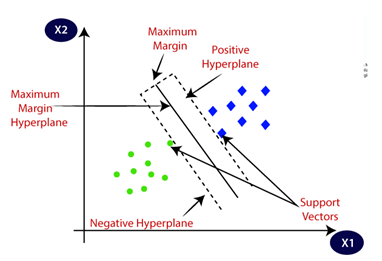

<b><h3>Margins:<h3></b>

The margin is a key concept in SVM. The larger the margin, the better the model generalizes to new, unseen data. SVM not only classifies data points but also maximizes the margin to improve robustness.

<b><h3>Support Vectors:<h3></b>

Support vectors are the data points that lie closest to the decision boundary (hyperplane). These vectors determine the optimal hyperplane and are crucial in defining the margin.

<b><h3>Linear and Non-linear SVM:<h3></b>

SVM can be applied to both linearly separable and non-linearly separable data. For linearly separable data, a linear SVM is used to find a straight-line hyperplane. In cases where the data is not linearly separable, SVM can use kernel functions (e.g., polynomial, radial basis function) to map the data into a higher-dimensional space, making it separable.

<b><h3>Soft Margin and C Parameter:<h3></b>

In real-world scenarios, data may not be perfectly separable. SVM introduces a soft margin to allow for some misclassification. The trade-off between maximizing the margin and allowing misclassification is controlled by the parameter C. A smaller C allows for a larger margin but permits more misclassification, while a larger C reduces the margin but enforces strict classification.

<b><h3>Kernel Trick:<h3></b>

The kernel trick is a powerful concept in SVM that allows it to handle non-linearly separable data by implicitly mapping it into a higher-dimensional space. Common kernel functions include polynomial kernels and radial basis function (RBF) kernels.

 The choice of the kernel can significantly impact the performance of the SVM. Here are some common types of kernels used in SVM:

* Linear Kernel (LinearSVC): This is the simplest kernel and is used for linearly separable data.

          from sklearn.svm import SVC
          svm_linear = SVC(kernel='linear')

* Polynomial Kernel (Poly): This kernel is used to handle non-linear data by introducing polynomial terms.

          from sklearn.svm import SVC
          svm_poly = SVC(kernel='poly', degree=3)

The degree parameter controls the degree of the polynomial.

* Radial Basis Function (RBF) Kernel (RBF or Gaussian): This is a versatile kernel that can handle a wide range of data types. It is commonly used when the decision boundary is not known or is highly complex.

          from sklearn.svm import SVC
          svm_rbf = SVC(kernel='rbf')

* Sigmoid Kernel: This kernel is often used in neural network applications.

          from sklearn.svm import SVC
          svm_sigmoid = SVC(kernel='sigmoid')

When choosing a kernel, it's important to consider the characteristics of data and the problem. Experimenting with different kernels and tuning hyperparameters using techniques like grid search can help identify the most effective kernel for your specific scenario.

<b><h3>Cost Function:<h3></b>

The objective of SVM is to minimize the cost function, which includes the regularization term based on the margin size and a penalty term for misclassification. The cost function is typically optimized using techniques like quadratic programming.

<b><h3>Decision Function:<h3></b>

The decision function in SVM assigns new data points to one of the two classes based on their position relative to the decision boundary. The sign of the function output determines the class.

<b><h3>Advantages of SVMs<h3></b>

* Effective for high-dimensional data

* Can handle non-linear relationships

* Robust to noise and outliers

* Interpretable when using linear kernel

<b><h3>Disadvantages of SVMs<h3></b>

* Can be computationally expensive for large datasets

* Sensitive to the choice of kernel function

* Performance can degrade in the presence of large margins

<b><h3>Applications:<h3></b>

SVM is widely used in various applications, including image classification, text classification, bioinformatics, and financial forecasting, due to its ability to handle complex decision boundaries and high-dimensional data.

In summary, Support Vector Machines provide an effective approach to classification and regression problems, offering versatility in handling both linear and non-linear relationships in data. The emphasis on maximizing margins makes SVM particularly robust and well-suited for a variety of real-world applications.

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [28]:
df = pd.read_csv('/content/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [11]:
# column names
column_names = df.columns
print(column_names)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
column_names_list = column_names.tolist()
print(column_names_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

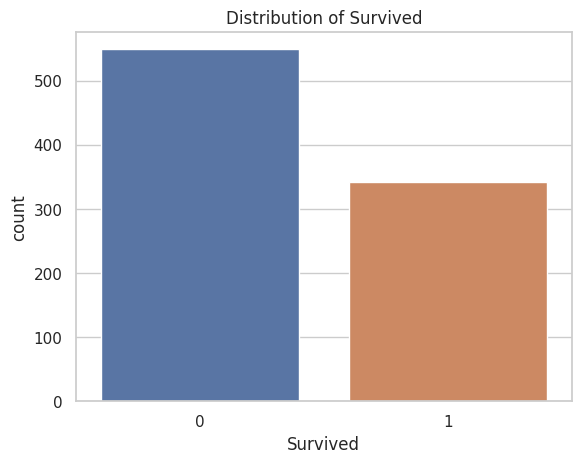

In [14]:
# Visualization 1: Bar plot of Survived counts
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

The graph shows that there were significantly more passengers who did not survive the sinking of the Titanic than those who did.

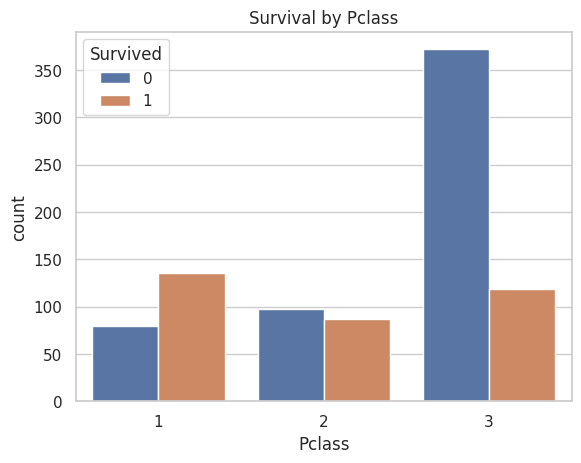

In [15]:
# Visualization 2: Bar plot of Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

The number of survivors by class on the Titanic. The x-axis shows the class, and the y-axis shows the number of survivors.

The graph shows that there were significantly fewer survivors from third class than from first or second class. This is likely due to a number of factors, including the fact that third class passengers were located in the lower parts of the ship, which were the first to flood.

The graph also shows that there were more survivors from first class than from second class. This is likely due to the fact that first class passengers had more access to resources and were more likely to be given priority when boarding lifeboats.

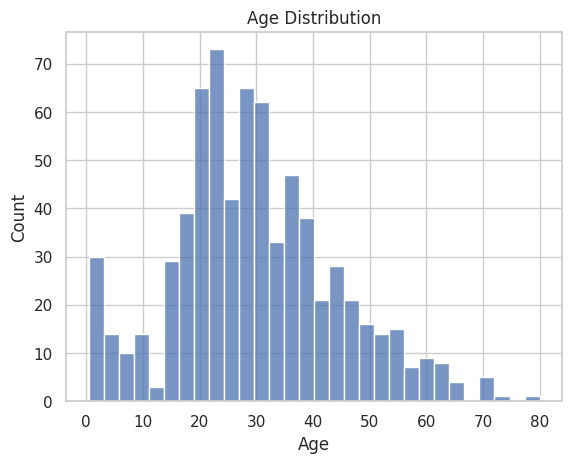

In [16]:
# Visualization 3: Age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

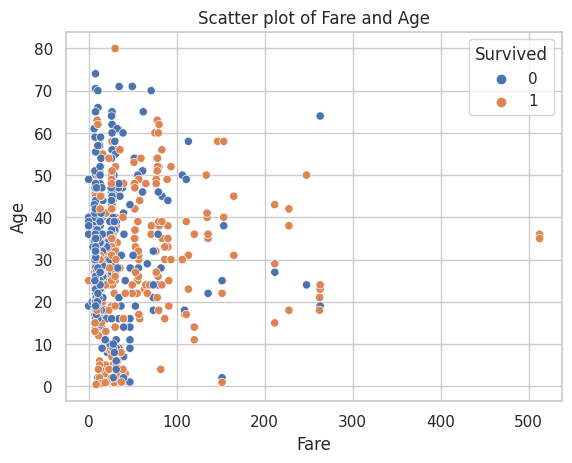

In [17]:
# Visualization 4: Scatter plot of Fare and Age
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=df)
plt.title('Scatter plot of Fare and Age')
plt.show()

<ipython-input-18-448693c9cefd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


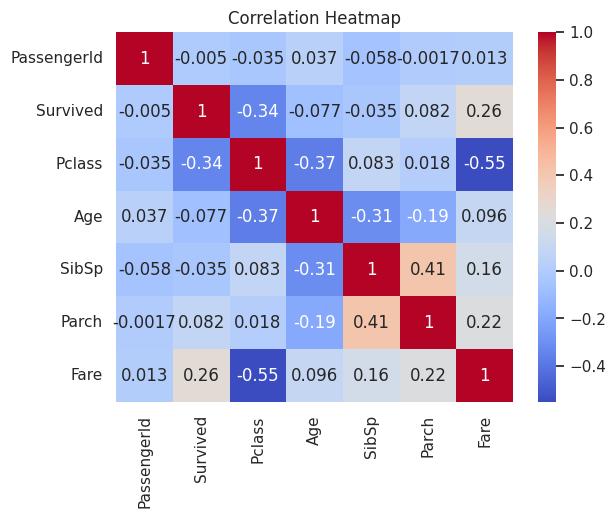

In [18]:
# Visualization 5: Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
# Select features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [30]:
# Handle missing values
X.fillna(0, inplace=True)

<ipython-input-30-cde3678807e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing features is important for Support Vector Machines (SVM) for several reasons:

* Sensitivity to Scale: SVM is sensitive to the scale of features. Features with larger scales may dominate the learning process, leading to a biased model. Standardizing the features brings them to a common scale, preventing this issue.

* Kernel Functions: SVM uses a kernel function to map the input features into a higher-dimensional space. The scale of the features can affect the performance of the kernel function. Standardizing ensures that the kernel operates on features with similar scales, improving the effectiveness of the SVM.

* Optimization Convergence: SVM involves solving a quadratic optimization problem. Standardizing features can speed up the convergence of optimization algorithms, making training faster and more efficient.

Here's a more detailed explanation of standardization:

Standardization (Z-score normalization): For each feature, standardization involves transforming it into a standard normal distribution with a mean of 0 and a standard deviation of 1. The formula for standardization is:

            x′=x−mean(x)std(x)x′=std(x)x−mean(x)​

where x′x′ is the standardized value, xx is the original value, mean(x)mean(x) is the mean of the feature, and std(x)std(x) is the standard deviation of the feature.

In [32]:
# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=3)  # experiment with different kernels and C values

In [50]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(C=3, kernel='linear')

In [51]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [52]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [53]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.74
Confusion Matrix:
[[88 17]
 [30 44]]


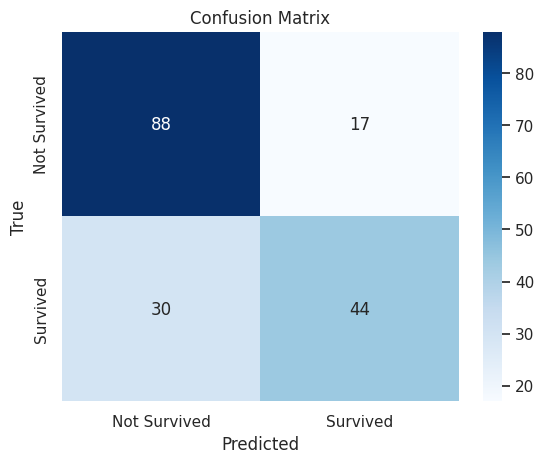

In [57]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Evaluation of a Support Vector Machine:


* Accuracy is the proportion of correctly classified instances out of the total instances. In this case, the accuracy is 0.74 or 74%. It means that the model correctly predicted the outcome (either survived or not survived) for 74% of the instances in the test set.


* Confusion Matrix:
  * True Positive (TP): 88 instances were correctly predicted as positive (Survived).
  * True Negative (TN): 44 instances were correctly predicted as negative (Not Survived).
  * False Positive (FP): 17 instances were incorrectly predicted as positive (Survived) when they were actually negative (Not Survived).
  * False Negative (FN): 30 instances were incorrectly predicted as negative (Not Survived) when they were actually positive (Survived).


These values helps to understand the strengths and weaknesses of SVM model. In this case, the model has relatively balanced performance, but there is room for improvement, especially in reducing false positives and false negatives. Depending on the specific goals and constraints of application, may need to fine-tune the model.